In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print(sys.version)

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


In [2]:
sns.set()
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
iris.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

### Simple Histogram with customized bins

In [5]:
versicolor_petal_length = np.array(iris.loc[iris.species == 'versicolor'].petal_length)
virginica_petal_length = np.array(iris.loc[iris.species == 'virginica'].petal_length)
setosa_petal_length = np.array(iris.loc[iris.species == 'setosa'].petal_length)


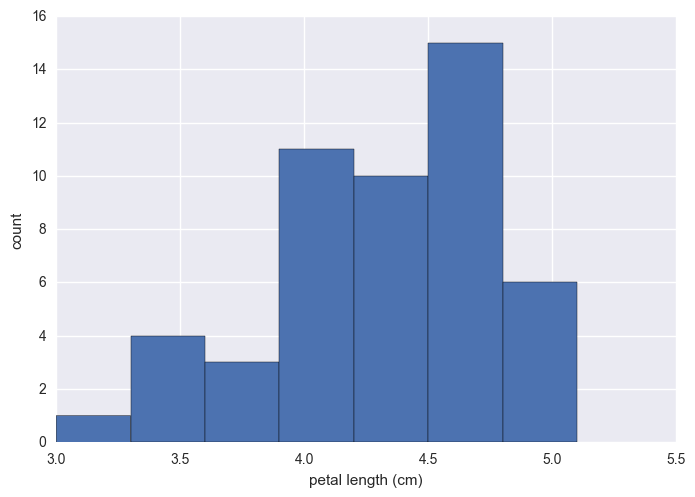

In [6]:

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points
n_bins = int(np.sqrt(n_data))

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


In [7]:
print(n_bins)

7


### Bee Swarm plot

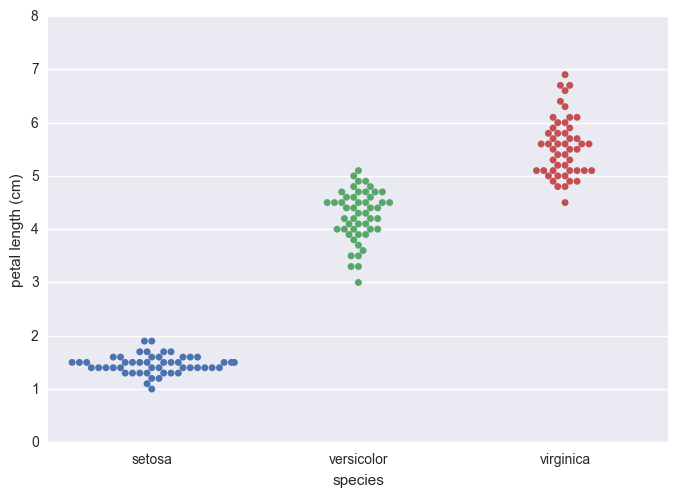

In [8]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal_length', data=iris)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### Empirical cumulative distribution functions 

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)
    x = np.sort(data)
    # The y data of the ECDF go from 1/n to 1 in equally spaced increments, that we construct using np.arange().
    # The end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. 
    # Be sure to divide this by n.
    y = np.arange(1, n+1) / n 

    return x, y

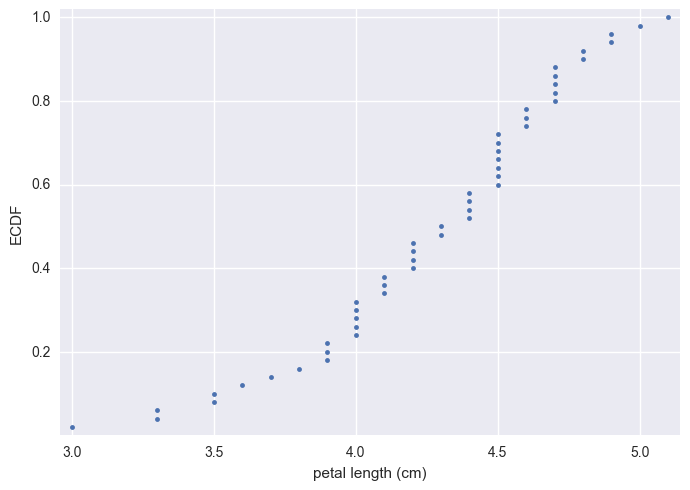

In [10]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


### Comparison of ECDFs

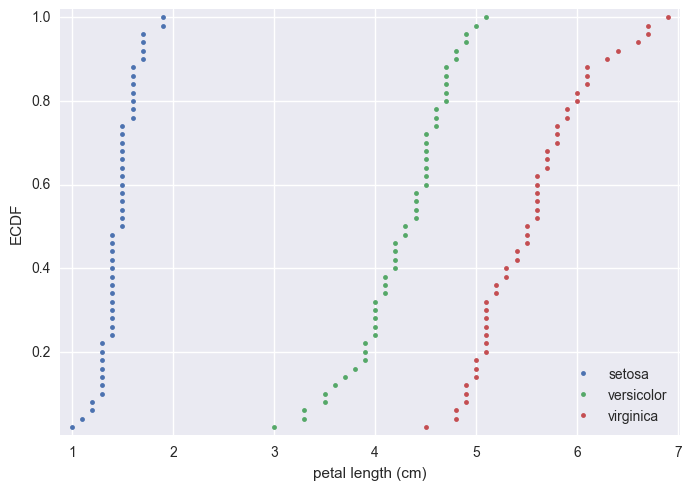

In [11]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

### Comparing percentiles to ECDF

In [12]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25.0,50.0,75.0,97.5])

ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
print(ptiles_vers)


[ 3.3     4.      4.35    4.6     4.9775]


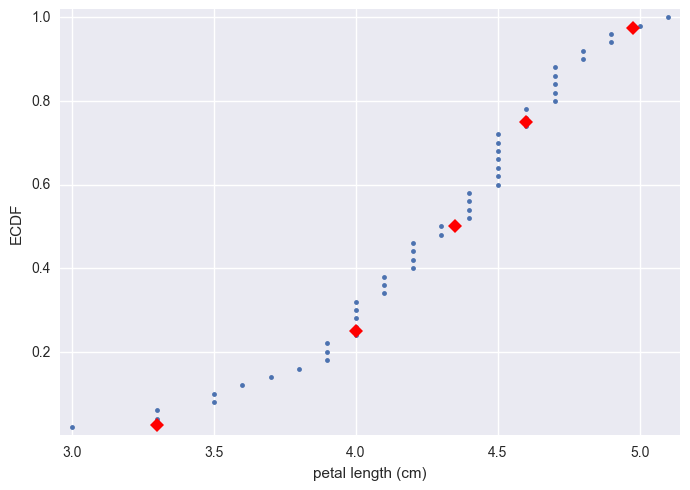

In [13]:
_ = plt.plot(x_vers, y_vers,'.')
plt.margins(0.02)

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot

plt.show()

### Box Plot

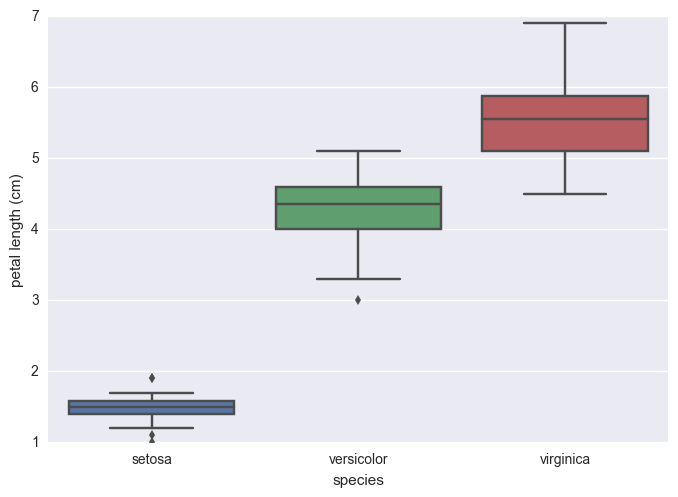

In [14]:
# Box plot
_ = sns.boxplot(x='species', y='petal_length', data=iris)

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

plt.show()

### Variance and Standard deviation 

  

variance:  $$\sigma^2 =\frac{1}{n} \sum_{i=0}^1(x_i- \bar{x})^2 $$

standard deviation: $$\sqrt(\sigma^2)$$ 

In [16]:
#variance
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
diff_sq = differences**2
variance_explicit = np.mean(diff_sq)

# numpy variance method
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.2164 0.2164


In [17]:
import math
# standard deviation
standard_deviation_explicit = variance_explicit**(0.5)

std_np = np.std(versicolor_petal_length)
print(standard_deviation_explicit, std_np)

0.465188133985 0.465188133985


### Covariance and Pearson correlation coefficient